<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

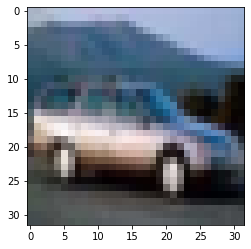

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

In [42]:
# MODIFY THE CODE TO ADD A VALIDATION SET
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=1/5, shuffle= True)

# train_images = train_images
# train_labels = train_labels

# train_images = train_images.reshape((50000, 32, 32, 3))
# train_images = train_images.astype('float32') / 255


x_train = x_train.reshape((40000, 32, 32, 3))
x_train = x_train.astype('float32') / 255

x_valid = x_valid.reshape((10000, 32, 32, 3))
x_valid = x_valid.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

# train_labels = to_categorical(train_labels)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
test_labels = to_categorical(test_labels)
# print(test_labels.shape)



(10000, 10)


In [0]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET
  
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.1))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(256, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.15))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 4, 4, 256)       

In [113]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET

model_hist = model.fit(x_train, y_train,
          epochs=50, batch_size=1024, validation_data=(x_valid, y_valid))
        

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 7s 169us/step - loss: 2.2602 - acc: 0.1472 - val_loss: 2.1144 - val_acc: 0.2525
Epoch 2/50
40000/40000 [==============================] - 5s 137us/step - loss: 2.0315 - acc: 0.2635 - val_loss: 1.8387 - val_acc: 0.3442
Epoch 3/50
40000/40000 [==============================] - 5s 137us/step - loss: 1.8722 - acc: 0.3250 - val_loss: 1.8374 - val_acc: 0.3185
Epoch 4/50
40000/40000 [==============================] - 6s 138us/step - loss: 1.7704 - acc: 0.3636 - val_loss: 1.8781 - val_acc: 0.3249
Epoch 5/50
40000/40000 [==============================] - 5s 137us/step - loss: 1.6897 - acc: 0.3916 - val_loss: 1.6942 - val_acc: 0.3830
Epoch 6/50
40000/40000 [==============================] - 5s 137us/step - loss: 1.6294 - acc: 0.4130 - val_loss: 1.6576 - val_acc: 0.4037
Epoch 7/50
40000/40000 [==============================] - 5s 137us/step - loss: 1.5711 - acc: 0.4357 - val_loss: 1.5869 - 

In [126]:
model_hist = model.fit(x_train, y_train,
          epochs=1, batch_size=1024, validation_data=(x_valid, y_valid))

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 5s 137us/step - loss: 0.5388 - acc: 0.8126 - val_loss: 0.8225 - val_acc: 0.7271


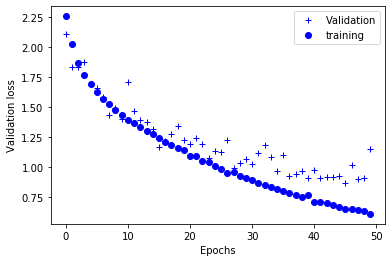

In [115]:
import matplotlib.pyplot as plt

# epochs = range(0, 20)
n_epochs = len(model_hist.history['loss'])
epochs = range(0, n_epochs)
train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [127]:
print(np.shape(test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss

(10000, 10)
10000/10000 [==============================] - 1s 138us/step
test_acc: 0.7304


0.8313265767097473

In [0]:
from google.colab import files
filename = './cifar10v4.h5'
model.save_weights(filename, overwrite=True)

files.download(filename) 